In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
hotpotqa = {
    "bm25" : {
        "flanT5": [],
        "flanUl2" : [],
        "llama_70b" : [],
        "llama_7b" : []
    },
    "colbert" : {
        "flanT5": [],
        "flanUl2" : [],
        "llama_70b" : [],
        "llama_7b" : []
    }
}

nq = {
    "bm25" : {
        "flanT5": [],
        "flanUl2" : [],
        "llama_70b" : [],
        "llama_7b" : []

        
    },
    "colbert" : {
        "flanT5": [],
        "flanUl2" : [],
        "llama_70b" : [],
        "llama_7b" : []
    }
}
metrics_all_em = {
    "hotpotqa" : hotpotqa,
    "nq" : nq
}

hotpotqa = {
    "bm25" : {
        "flanT5": [],
        "flanUl2" : [],
        "llama_70b" : [],
        "llama_7b" : []
    },
    "colbert" : {
        "flanT5": [],
        "flanUl2" : [],
        "llama_70b" : [],
        "llama_7b" : []
    }
}

nq = {
    "bm25" : {
        "flanT5": [],
        "flanUl2" : [],
        "llama_70b" : [],
        "llama_7b" : []

        
    },
    "colbert" : {
        "flanT5": [],
        "flanUl2" : [],
        "llama_70b" : [],
        "llama_7b" : []
    }
}
metrics_all_f1 = {
    "hotpotqa" : hotpotqa,
    "nq" : nq
}

In [2]:
from file_utils import read_json

base_folder = "/data/tir/projects/tir6/general/afreens/dbqa/reader_results"
models = "flanT5 flanUl2 llama_70b llama_7b".split(" ")
datasets = "hotpotqa nq".split(" ")
retrievers = "bm25 colbert".split(" ")
for model in models:
    for dataset in datasets:
        for retriever in retrievers:
            file = f"{base_folder}/{model}/{dataset}/{retriever}/combined_metrics.json"
            metrics = read_json(file)
            print(len(metrics))
            metrics_all_em[dataset][retriever][model] = [v["exact_match"] for k,v in metrics.items()]
            metrics_all_f1[dataset][retriever][model] = [v["f1"] for k,v in metrics.items()]
            

reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/hotpotqa/bm25/combined_metrics.json
9
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/hotpotqa/colbert/combined_metrics.json
9
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/nq/bm25/combined_metrics.json
9
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/nq/colbert/combined_metrics.json
9
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/hotpotqa/bm25/combined_metrics.json
9
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/hotpotqa/colbert/combined_metrics.json
9
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/nq/bm25/combined_metrics.json
9
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/nq/colbert/combined_metrics.json
9
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader

## Individual plots


In [3]:
x = ['top1', 'top2', 'top3','top5','top10','top20','top30','top50']
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
def plot_top_ks(axis, data, title, colors):
    axis.yaxis.set_ticks(np.arange(0,0.5,0.025))
    axis.yaxis.set_tick_params(which='both', labelbottom=True)
    i=0
    no_contexts = []
    for (model, values), color in zip(list(data.items()), colors):
        random_color = color
        y = values[1:]
        if values[0] in no_contexts:
            values[0]-=0.005
        if values[0] == 0:
            values[0]= 0.2
        
        no_contexts.append(values[0])
        no_context = [values[0]]*len(y)
        axis.plot(x, y, label = model, linestyle="-", color=random_color)
        axis.plot(x, no_context, label = f"{model}_no_context", linestyle="--", color=random_color)
        axis.set_title(title)
        i+=1


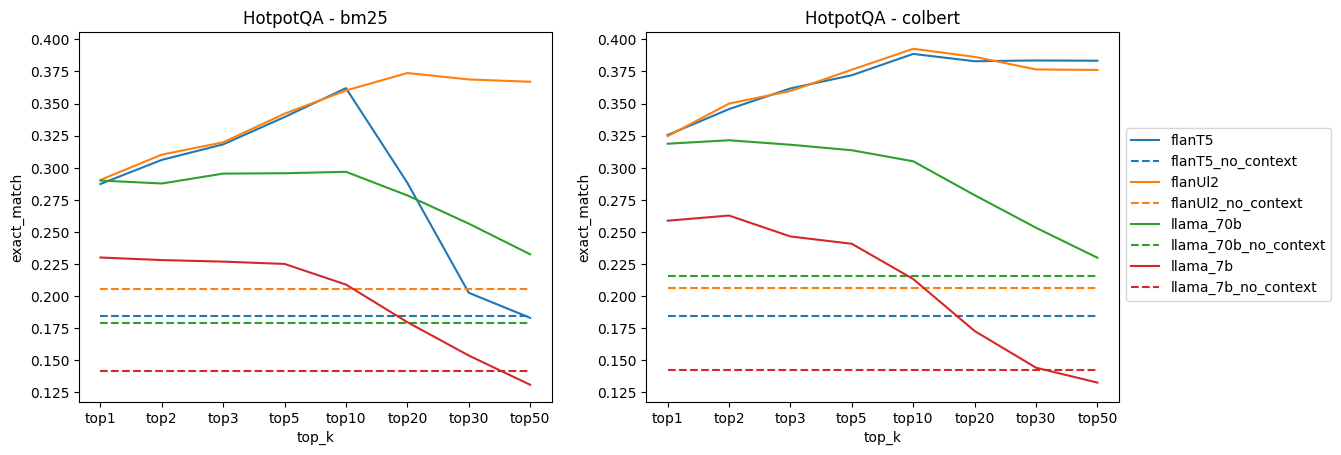

In [4]:
#hotpotqa (BM25+colbert)
metric_to_plot = "exact_match"
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
plot_top_ks(axes[0], metrics_all_em["hotpotqa"]["bm25"], "HotpotQA - bm25", colors)
plot_top_ks(axes[1], metrics_all_em["hotpotqa"]["colbert"], "HotpotQA - colbert", colors)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles*2, labels, loc='center left', bbox_to_anchor=(1.75, 0.5))
fig.subplots_adjust(right=1.75)
for ax in axes.flat:
    ax.set(xlabel='top_k', ylabel=metric_to_plot)
plt.show()


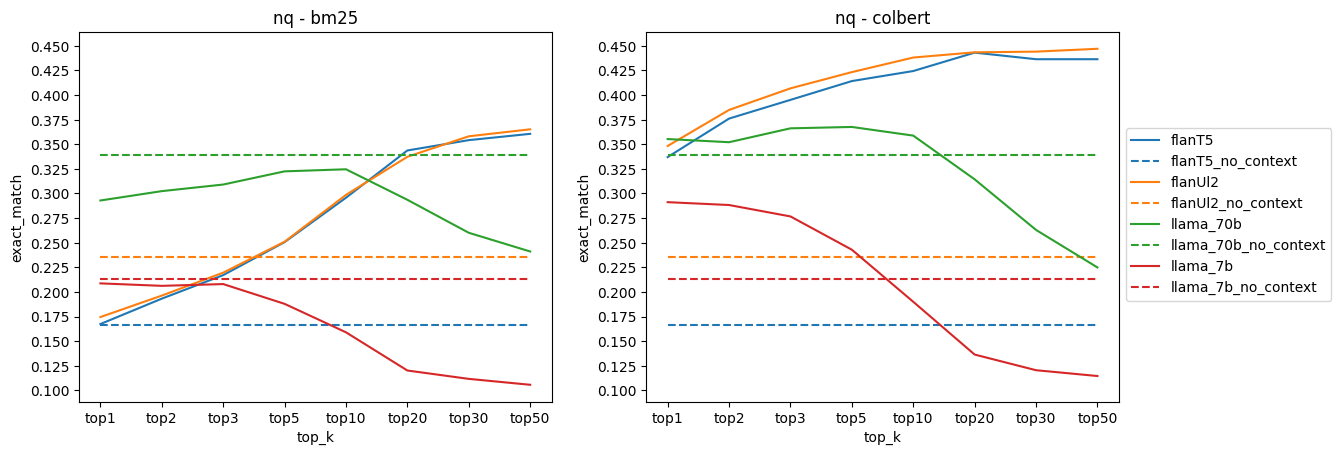

In [5]:
#nq (BM25+colbert)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
plot_top_ks(axes[0], metrics_all_em["nq"]["bm25"], "nq - bm25", colors)
plot_top_ks(axes[1], metrics_all_em["nq"]["colbert"], "nq - colbert", colors)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles*2, labels, loc='center left', bbox_to_anchor=(1.75, 0.5))
fig.subplots_adjust(right=1.75)
for ax in axes.flat:
    ax.set(xlabel='top_k', ylabel=metric_to_plot)
plt.show()


In [6]:
from file_utils import read_json

metric_to_plot = "f1"            

In [7]:
metrics_all_f1["hotpotqa"]["colbert"]

{'flanT5': [0.2741,
  0.4344,
  0.4589,
  0.4784,
  0.4929,
  0.5079,
  0.5006,
  0.4999,
  0.5],
 'flanUl2': [0.2961,
  0.434,
  0.4639,
  0.4778,
  0.4944,
  0.5151,
  0.504,
  0.4948,
  0.4944],
 'llama_70b': [0.3231,
  0.4626,
  0.4635,
  0.4621,
  0.4586,
  0.4503,
  0.4213,
  0.3882,
  0.3584],
 'llama_7b': [0.234,
  0.3813,
  0.3861,
  0.373,
  0.3676,
  0.3444,
  0.2998,
  0.2627,
  0.2476]}

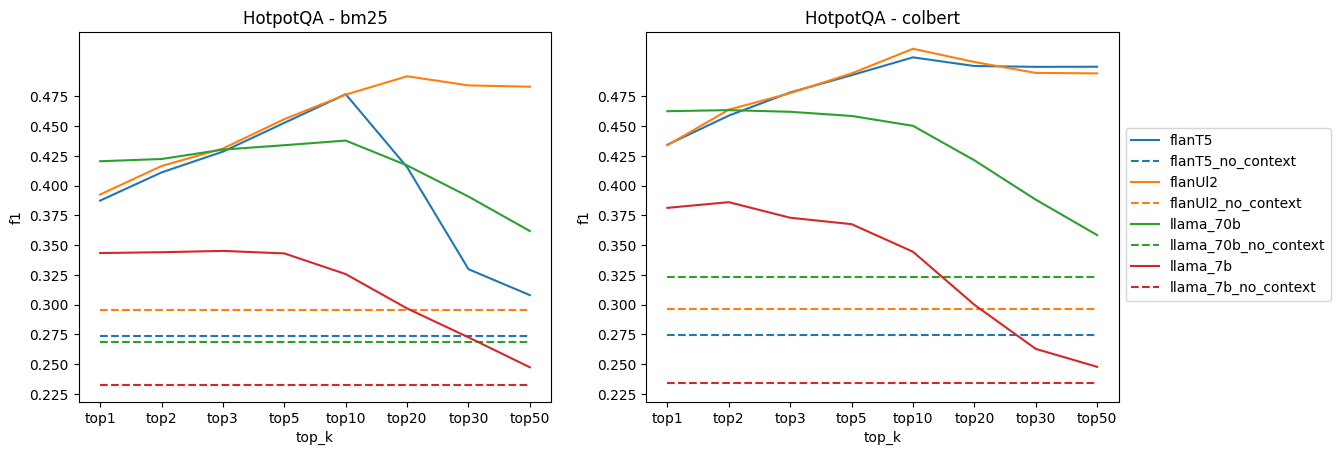

In [8]:
#hotpotqa (BM25+colbert)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
plot_top_ks(axes[0], metrics_all_f1["hotpotqa"]["bm25"], "HotpotQA - bm25", colors)
plot_top_ks(axes[1], metrics_all_f1["hotpotqa"]["colbert"], "HotpotQA - colbert", colors)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles*2, labels, loc='center left', bbox_to_anchor=(1.75, 0.5))
fig.subplots_adjust(right=1.75)
for ax in axes.flat:
    ax.set(xlabel='top_k', ylabel=metric_to_plot)
plt.show()


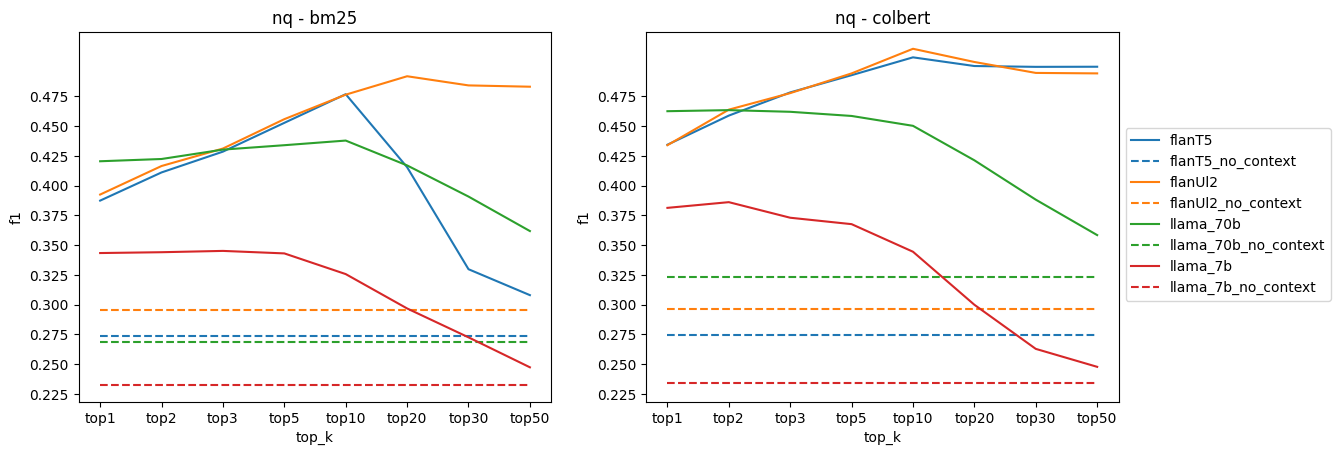

In [9]:
#nq - BM25 + colbert

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
plot_top_ks(axes[0], metrics_all_f1["hotpotqa"]["bm25"], "nq - bm25", colors)
plot_top_ks(axes[1], metrics_all_f1["hotpotqa"]["colbert"], "nq - colbert", colors)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles*2, labels, loc='center left', bbox_to_anchor=(1.75, 0.5))
fig.subplots_adjust(right=1.75)
for ax in axes.flat:
    ax.set(xlabel='top_k', ylabel=metric_to_plot)
plt.show()


In [10]:
metrics_all_f1

{'hotpotqa': {'bm25': {'flanT5': [0.2739,
    0.3874,
    0.4111,
    0.4286,
    0.4528,
    0.4769,
    0.4155,
    0.3297,
    0.3079],
   'flanUl2': [0.2953,
    0.3925,
    0.4165,
    0.4312,
    0.4559,
    0.4765,
    0.492,
    0.4843,
    0.4832],
   'llama_70b': [0.2689,
    0.4205,
    0.4224,
    0.4303,
    0.434,
    0.4379,
    0.417,
    0.3908,
    0.3618],
   'llama_7b': [0.2325,
    0.3433,
    0.344,
    0.3451,
    0.343,
    0.3256,
    0.2967,
    0.2724,
    0.2472]},
  'colbert': {'flanT5': [0.2741,
    0.4344,
    0.4589,
    0.4784,
    0.4929,
    0.5079,
    0.5006,
    0.4999,
    0.5],
   'flanUl2': [0.2961,
    0.434,
    0.4639,
    0.4778,
    0.4944,
    0.5151,
    0.504,
    0.4948,
    0.4944],
   'llama_70b': [0.3231,
    0.4626,
    0.4635,
    0.4621,
    0.4586,
    0.4503,
    0.4213,
    0.3882,
    0.3584],
   'llama_7b': [0.234,
    0.3813,
    0.3861,
    0.373,
    0.3676,
    0.3444,
    0.2998,
    0.2627,
    0.2476]}},
 'nq': {'bm25'

In [19]:
import csv
import itertools
import sys

#HOTPOTQA 
fields = [ 'top_k', 'bm25_em', 'colbert_em', 'bm25_f1', 'colbert_f1' ]

csv_data = {
    "flanT5" : {'no_context': { },
           'top1': { },
           'top10': { },
           'top50': { }},

"flanUl2" : {'no_context': { },
           'top1': { },
           'top10': { },
           'top50': { }},

"llama_70b" : {'no_context': { },
           'top1': { },
           'top10': { },
           'top50': { }},

"llama_7b" : {'no_context': { },
           'top1': { },
           'top10': { },
           'top50': { }}
}

base_folder = "/data/tir/projects/tir6/general/afreens/dbqa/reader_results"
models = "flanT5 flanUl2 llama_70b llama_7b".split(" ")
datasets = "hotpotqa".split(" ")
retrievers = "bm25 colbert".split(" ")
for model in models:
    for dataset in datasets:
        for retriever in retrievers:
            file = f"{base_folder}/{model}/{dataset}/{retriever}/combined_metrics.json"
            metrics = read_json(file)
            no_context = {f"{retriever}_em": round(metrics["baseline"]["exact_match"]*100,2), f"{retriever}_f1": round(metrics["baseline"]["f1"]*100, 2)}
            top1 = {f"{retriever}_em": round(metrics["top1"]["exact_match"]*100, 2), f"{retriever}_f1": round(metrics["top1"]["f1"]*100, 2)}
            top10 = {f"{retriever}_em": round(metrics["top10"]["exact_match"]*100, 2), f"{retriever}_f1": round(metrics["top10"]["f1"]*100,2)}
            top50 = {f"{retriever}_em": round(metrics["top50"]["exact_match"]*100, 2), f"{retriever}_f1": round(metrics["top50"]["f1"]*100,2)}

            csv_data[model]["no_context"].update(no_context)
            csv_data[model]["top1"].update(top1)
            csv_data[model]["top10"].update(top10)
            csv_data[model]["top50"].update(top50)


dw = csv_data["flanT5"]
w = csv.DictWriter( open("test_output.csv", "w"), fields )
for key,val in dw.items():
    row = {'top_k': key}
    row.update(val)
    print(row)
    w.writerow(row)

dw = csv_data["flanUl2"]
for key,val in dw.items():
    row = {'top_k': key}
    row.update(val)
    print(row)
    w.writerow(row)
dw = csv_data["llama_7b"]
for key,val in dw.items():
    row = {'top_k': key}
    row.update(val)
    print(row)
    w.writerow(row)
dw = csv_data["llama_70b"]
for key,val in dw.items():
    row = {'top_k': key}
    row.update(val)
    print(row)
    w.writerow(row)



reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/hotpotqa/bm25/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/hotpotqa/colbert/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/hotpotqa/bm25/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/hotpotqa/colbert/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_70b/hotpotqa/bm25/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_70b/hotpotqa/colbert/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_7b/hotpotqa/bm25/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_7b/hotpotqa/colbert/combined_metrics.json
{'top_k': 'no_context', 'bm25_em': 18.43, 'bm25_

In [21]:
import csv
import itertools
import sys

#HOTPOTQA 
fields = [ 'top_k', 'bm25_em', 'colbert_em', 'bm25_f1', 'colbert_f1' ]

csv_data = {
    "flanT5" : {'no_context': { },
           'top1': { },
           'top10': { },
           'top50': { }},

"flanUl2" : {'no_context': { },
           'top1': { },
           'top10': { },
           'top50': { }},

"llama_70b" : {'no_context': { },
           'top1': { },
           'top10': { },
           'top50': { }},

"llama_7b" : {'no_context': { },
           'top1': { },
           'top10': { },
           'top50': { }}
}

base_folder = "/data/tir/projects/tir6/general/afreens/dbqa/reader_results"
models = "flanT5 flanUl2 llama_70b llama_7b".split(" ")
datasets = "nq".split(" ")
retrievers = "bm25 colbert".split(" ")
for model in models:
    for dataset in datasets:
        for retriever in retrievers:
            file = f"{base_folder}/{model}/{dataset}/{retriever}/combined_metrics.json"
            metrics = read_json(file)
            no_context = {f"{retriever}_em": round(metrics["baseline"]["exact_match"]*100,2), f"{retriever}_f1": round(metrics["baseline"]["f1"]*100, 2)}
            top1 = {f"{retriever}_em": round(metrics["top1"]["exact_match"]*100, 2), f"{retriever}_f1": round(metrics["top1"]["f1"]*100, 2)}
            top10 = {f"{retriever}_em": round(metrics["top10"]["exact_match"]*100, 2), f"{retriever}_f1": round(metrics["top10"]["f1"]*100,2)}
            top50 = {f"{retriever}_em": round(metrics["top50"]["exact_match"]*100, 2), f"{retriever}_f1": round(metrics["top50"]["f1"]*100,2)}

            csv_data[model]["no_context"].update(no_context)
            csv_data[model]["top1"].update(top1)
            csv_data[model]["top10"].update(top10)
            csv_data[model]["top50"].update(top50)


dw = csv_data["flanT5"]
w = csv.DictWriter( open("test_output.csv", "w"), fields )
for key,val in dw.items():
    row = {'top_k': key}
    row.update(val)
    print(row)
    w.writerow(row)

dw = csv_data["flanUl2"]
for key,val in dw.items():
    row = {'top_k': key}
    row.update(val)
    print(row)
    w.writerow(row)
dw = csv_data["llama_7b"]
for key,val in dw.items():
    row = {'top_k': key}
    row.update(val)
    print(row)
    w.writerow(row)
dw = csv_data["llama_70b"]
for key,val in dw.items():
    row = {'top_k': key}
    row.update(val)
    print(row)
    w.writerow(row)



reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/nq/bm25/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/nq/colbert/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/nq/bm25/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/nq/colbert/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_70b/nq/bm25/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_70b/nq/colbert/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_7b/nq/bm25/combined_metrics.json
reading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama_7b/nq/colbert/combined_metrics.json
{'top_k': 'no_context', 'bm25_em': 16.64, 'bm25_f1': 24.01, 'colbert_em': 16.64, 'colbert_f1': 2